In [1]:
import numpy as np

In [2]:
import kwant
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
import scipy.linalg as la
import numpy as np

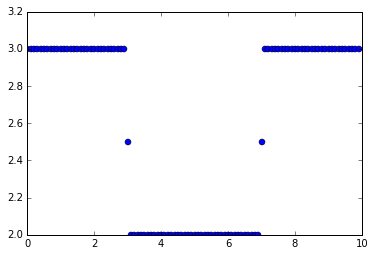

In [94]:
def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

A1, A2, A3 = 3, 2, 3
x1, x2 = 3, 7

def A(x):
    return (A1 * heaviside(-(x-x1)) +
            A2 * heaviside(x-x1) * heaviside(-(x-x2)) + 
            A3 * heaviside(x-x2))
    
x = np.arange(0,10,0.1)
y = A(x)    

plt.plot(x,y, 'o')

In [11]:
# a = 0.25
# lengths = [3, 2, 3]
# num_points = [int(L/a) for L in lengths]


# N = sum(num_points)
# L = sum(lengths)

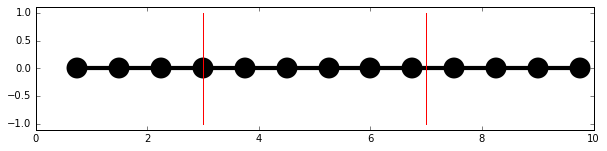

In [93]:
x1, x2 = [3, 7]

A = 1
L = 10
a = .75

def shape(pos):
    (x, ) = pos
    return (0 < x < L)

lat = kwant.lattice.chain(a)
sys = kwant.Builder()

sys[lat.shape(shape, (a, ))] = 2*A/a**2
sys[kwant.HoppingKind((1, ), lat)] = -A/a**2


fig = kwant.plot(sys, show=False, fig_size=(10,5))
ax = fig.get_axes()[0]
ax.set_xlim(0,L)
plt.plot([x1,x1], [-1,1], 'r-')
plt.plot([x2,x2], [-1,1], 'r-')

In [90]:
sys=sys.finalized()

AttributeError: 'FiniteSystem' object has no attribute 'finalized'

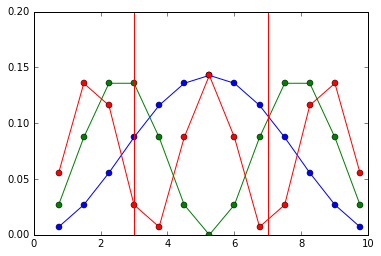

In [89]:
ham = sys.hamiltonian_submatrix()
ev, evec = la.eigh(ham)

x = [s.pos[0] for s in sys.sites]
indx = np.argsort(x)

x = np.array(x)[indx]
evec = evec[indx, :]

for i in range(3):
    plt.plot(x, np.abs(evec[:,i])**2, 'o-')

plt.xlim(0,10)
plt.ylim(0.,.2)
plt.plot([x1,x1], [-1,1], 'r-')
plt.plot([x2,x2], [-1,1], 'r-')